# **<center>PROYECTO DIPLOMADO</center>**

**<center>¿Qué habilidades y herramientas son las más demandadas para los puestos de Analista de Datos en Colombia?</center>**

## **LIBRERÍAS**

In [1]:
# Python 3.10.8

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # Varios gráficos
import seaborn as sns # Gráficos bonitos con seaborn
sns.set() # Elegir seaborn como defecto para pandas

from collections import Counter # Palabras frecuentes

# Palabras vacías
import nltk
#nltk.download('stopwords') # descargar sólo una vez
from nltk.corpus import stopwords

#World Cloud - Nube de palabras
from wordcloud import WordCloud
from PIL import Image
 
## Modelos
#pip install sentencepiece
#pip install -U sentence-transformers
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util

#pip install umap-learn
import umap # Reducción de dimensiones

# Clustering
import sklearn.cluster as cluster # K-means

## **IMPORTACIÓN DATOS TRADUCIDOS**

In [2]:
# Importación
df = pd.read_csv('../Datos/trans_linkedin.csv')
df.head()

,Título,Empresa,Modalidad de trabajo,Publicación,Descripción,Descripción (inglés),idioma,Jornada laboral,Nivel de experiencia,Municipio,Departamento,País
0,Work From Home Golang Developer,Workling,En remoto,07/11/22,Acerca del empleo Location: Remote WFH All Lat...,Location: Remote WFH All Latin American Candid...,en,Jornada completa,Algo de responsabilidad,Cali,Valle del Cauca,Colombia
1,Developer Support Engineer Student Worker,Unity,Presencial,07/11/22,Acerca del empleo The opportunity Unity’s Eng...,The opportunity Unity’s Engine Support Team i...,en,Jornada completa,Sin experiencia,Perimetro Urbano Pereira,Risaralda,Colombia
2,Practicante Profesional,Banco AV Villas,Híbrido,07/11/22,Acerca del empleo El Banco Comercial AV Villas...,The Commercial Bank AV Villas believe that edu...,en,Jornada completa,Algo de responsabilidad,Bogotá,Distrito Capital,Colombia
3,Influencer Marketing Specialist,Edelman,Presencial,07/11/22,Acerca del empleo En Edelman estamos buscando ...,En Edelman estamos buscando un Influencer Mark...,en,Jornada completa,Algo de responsabilidad,Bogotá,Distrito Capital,Colombia
4,Data Engineer,Kin + Carta,Presencial,07/11/22,"Acerca del empleo At Kin + Carta, we’ve got op...","At Kin + Carta, we’ve got opportunities to off...",en,Jornada completa,Algo de responsabilidad,Colombia,Huila,Colombia


## **ANÁLISIS DESCRIPTIVO**

### **GENERAL**

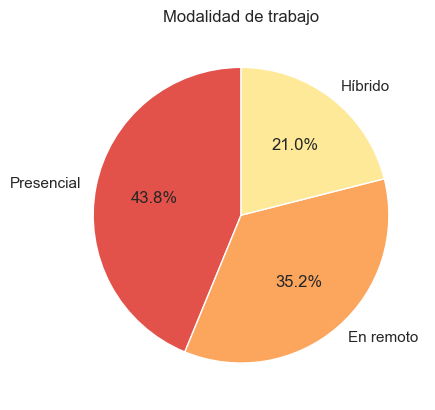

In [3]:
# Modalidad de trabajo
colores = sns.color_palette("Spectral")
s = df["Modalidad de trabajo"].value_counts()
plt.pie(s, labels = s.index, colors = colores, startangle = 90, autopct = '%1.1f%%')
plt.title('Modalidad de trabajo');

In [4]:
Jor_exp = df.groupby(["Jornada laboral", "Nivel de experiencia"]).size().reset_index(name = 'Frecuencia')
Jor_exp

,Jornada laboral,Nivel de experiencia,Frecuencia
0,Jornada completa,Algo de responsabilidad,93
1,Jornada completa,Prácticas,7
2,Jornada completa,Sin experiencia,177
3,Media jornada,Algo de responsabilidad,1
4,Media jornada,Sin experiencia,3
5,Prácticas,Prácticas,3


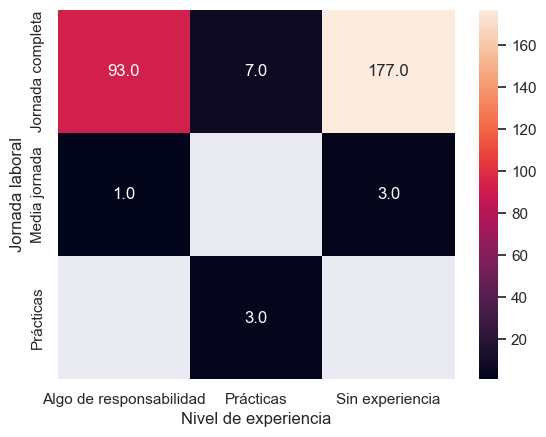

In [5]:
Jor_exp_heat = Jor_exp.pivot_table(values = 'Frecuencia', index = 'Jornada laboral',columns = 'Nivel de experiencia', aggfunc = 'mean')
sns.heatmap(Jor_exp_heat, annot = True, fmt = '.1f');

### **NÚMERO DE PALABRAS**

In [6]:
# Núeva columna con número de palabras
df["num_pal"] = (df["Descripción (inglés)"].str.split().str.len().fillna(0)).astype(int)
df.head()

,Título,Empresa,Modalidad de trabajo,Publicación,Descripción,Descripción (inglés),idioma,Jornada laboral,Nivel de experiencia,Municipio,Departamento,País,num_pal
0,Work From Home Golang Developer,Workling,En remoto,07/11/22,Acerca del empleo Location: Remote WFH All Lat...,Location: Remote WFH All Latin American Candid...,en,Jornada completa,Algo de responsabilidad,Cali,Valle del Cauca,Colombia,261
1,Developer Support Engineer Student Worker,Unity,Presencial,07/11/22,Acerca del empleo The opportunity Unity’s Eng...,The opportunity Unity’s Engine Support Team i...,en,Jornada completa,Sin experiencia,Perimetro Urbano Pereira,Risaralda,Colombia,524
2,Practicante Profesional,Banco AV Villas,Híbrido,07/11/22,Acerca del empleo El Banco Comercial AV Villas...,The Commercial Bank AV Villas believe that edu...,en,Jornada completa,Algo de responsabilidad,Bogotá,Distrito Capital,Colombia,112
3,Influencer Marketing Specialist,Edelman,Presencial,07/11/22,Acerca del empleo En Edelman estamos buscando ...,En Edelman estamos buscando un Influencer Mark...,en,Jornada completa,Algo de responsabilidad,Bogotá,Distrito Capital,Colombia,296
4,Data Engineer,Kin + Carta,Presencial,07/11/22,"Acerca del empleo At Kin + Carta, we’ve got op...","At Kin + Carta, we’ve got opportunities to off...",en,Jornada completa,Algo de responsabilidad,Colombia,Huila,Colombia,737


In [7]:
# Resumen palabras
print("sum", sum(df["num_pal"]))
print(df["num_pal"].describe())

sum 96502
count     290.000000
mean      332.765517
std       254.253994
min        24.000000
25%       138.000000
50%       209.000000
75%       521.750000
max      1315.000000
Name: num_pal, dtype: float64


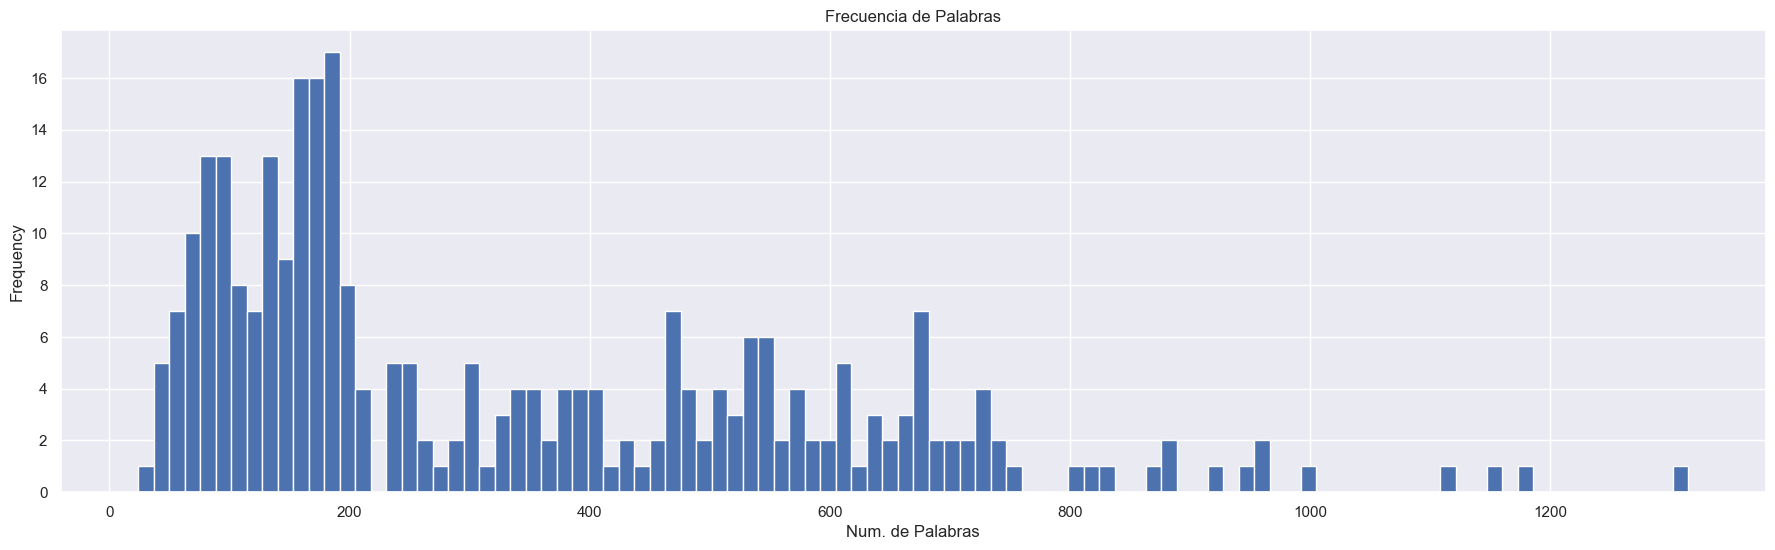

In [8]:
# Frecuencia de Palabras
plt.figure(figsize=(22,6))

df['num_pal'].plot(kind = 'hist', bins = 100)
plt.title('Frecuencia de Palabras')
plt.xlabel('Num. de Palabras');

In [9]:
# Palabras más frecuentes (sin palabras vacías)
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['Descripción_no_stpwds'] = df["Descripción (inglés)"].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

most_common = Counter(" ".join(df["Descripción_no_stpwds"]).split())
print(most_common.most_common(100))

[('experience', 678), ('work', 547), ('data', 485), ('business', 380), ('team', 352), ('support', 285), ('working', 261), ('development', 256), ('software', 246), ('knowledge', 231), ('management', 230), ('new', 212), ('years', 205), ('technical', 200), ('company', 198), ('ability', 187), ('customer', 182), ('skills', 177), ('product', 173), ('looking', 157), ('solutions', 155), ('global', 154), ('-', 153), ('&', 153), ('related', 147), ('environment', 140), ('help', 139), ('job', 136), ('strong', 133), ('information', 130), ('english', 126), ('opportunity', 126), ('projects', 125), ('digital', 125), ('build', 124), ('role', 124), ('teams', 123), ('professional', 122), ('technology', 122), ('cloud', 121), ('customers', 121), ('financial', 121), ('best', 119), ('people', 119), ('ensure', 118), ('tools', 118), ('analysis', 116), ('services', 116), ('us', 113), ('communication', 112), ('develop', 109), ('systems', 106), ('design', 104), ('clients', 103), ('including', 103), ('building', 1

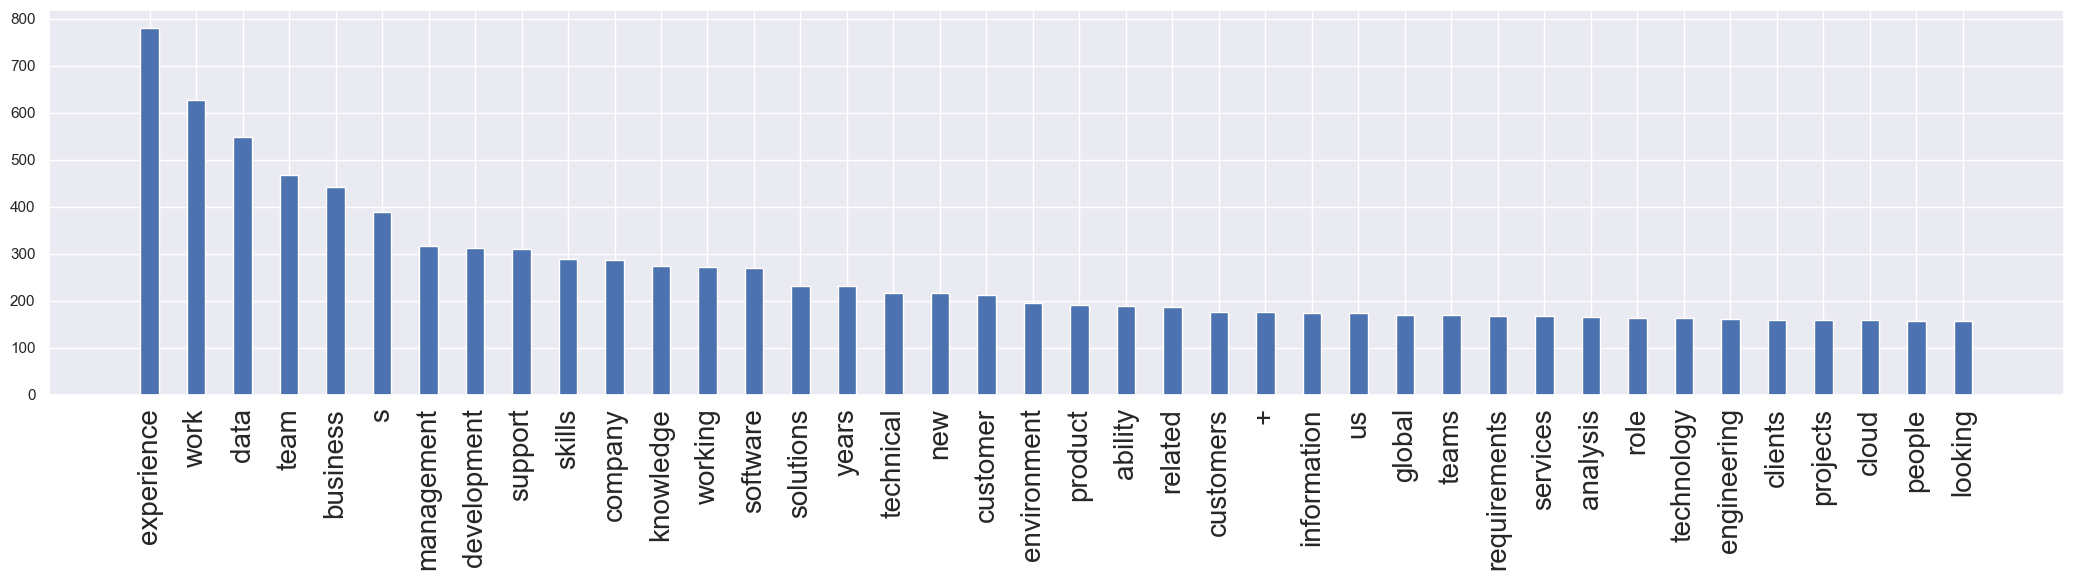

In [10]:
# Gráfica con palabras más frecuentes
plt.figure(figsize = (26, 5))

df["Descripción_no_stpwds"] = df["Descripción_no_stpwds"].replace('[^\w+]|\d+|\s+|_',' ', regex=True).str.strip()

most_common = Counter(" ".join(df["Descripción_no_stpwds"]).split())
most_common_show = most_common.most_common(40)

labels = list(list(zip(*most_common_show))[0])
values = list(list(zip(*most_common_show))[1])

plt.bar(labels, values, width = 0.4);
plt.xticks(labels, fontsize=20, rotation=90);

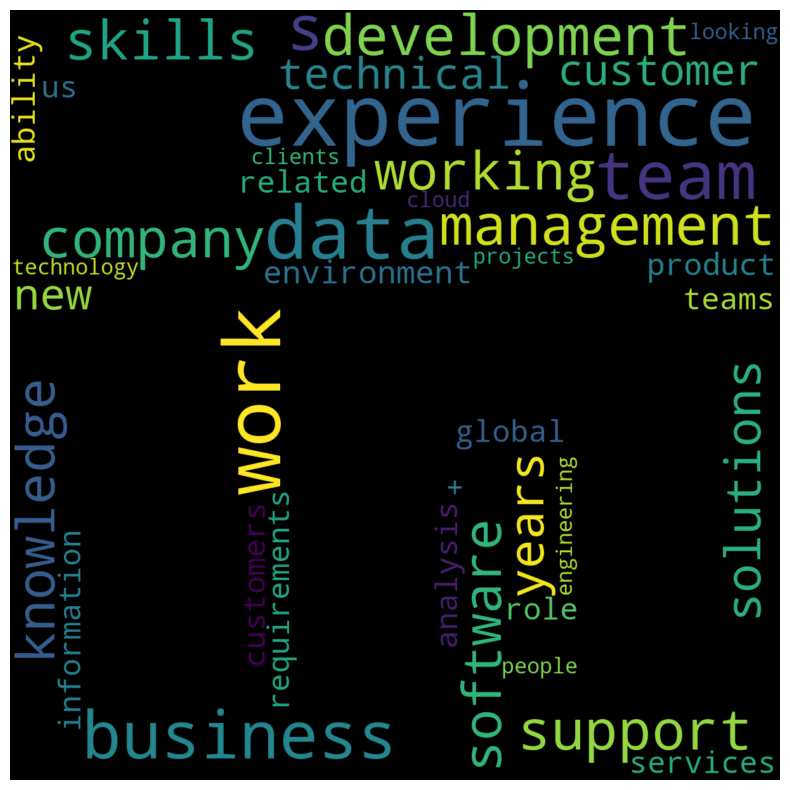

In [11]:
most_common_show_dict = dict(most_common_show)
img = np.array(Image.open('../Imagenes/linkedin_logo.png'))
wc = WordCloud(width = 800, height = 400, mask = img).generate_from_frequencies(most_common_show_dict)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

## **EMBEDDING**
Texto a coordenadas numéricas

In [12]:
# Modelo
model_name = 'sentence-transformers/all-mpnet-base-v2'
model = SentenceTransformer(model_name_or_path = model_name)

In [13]:
# Pasando texto a coordenadas numéricas
embeddings = model.encode(df['Descripción (inglés)'].values, show_progress_bar = True)

Batches:   0%|          | 0/10 [00:00<?, ?it/s]

In [14]:
# Forma (descripciones o características)
embeddings.shape

(290, 768)

In [15]:
# Guardar tabla
pd.DataFrame(embeddings).to_csv('../Datos/embeddings_linkedin.csv', index = False)

# Visualizar embeddings como df
pd.DataFrame(embeddings)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.009703,0.046200,-0.052805,-0.022653,0.026171,-0.001928,-0.037157,0.010471,0.004875,-0.028102,...,0.012786,0.016145,-0.002070,0.049547,-0.049383,0.049174,-0.009028,-0.011031,0.002036,-0.032941
1,0.040089,0.002582,-0.024421,-0.015458,0.047245,0.055460,-0.002754,-0.024735,0.038721,-0.059772,...,0.022943,-0.024950,0.038649,-0.002983,-0.040633,-0.032171,-0.019366,-0.019252,0.018915,-0.024107
2,-0.005962,0.008402,-0.039225,-0.001206,0.070466,0.009183,0.029067,-0.030250,-0.049461,0.008576,...,-0.052847,0.031258,0.016758,0.019805,-0.012082,-0.021064,-0.020568,-0.005675,-0.025377,0.002665
3,0.041839,0.030781,-0.037398,-0.047174,0.006052,0.001808,0.020756,0.003426,-0.006346,-0.033869,...,-0.045900,0.022757,-0.047512,0.039823,-0.019757,-0.021020,-0.050789,0.006239,-0.033690,-0.026719
4,0.037935,0.067597,-0.066866,-0.027561,0.007782,0.039043,-0.039968,-0.028375,0.016988,-0.024193,...,0.037571,0.000352,-0.030155,0.050281,-0.033652,0.051465,-0.030984,0.006300,-0.025025,-0.028696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,-0.022722,0.061574,-0.026870,-0.039126,0.047065,-0.030785,-0.020040,-0.012336,-0.036039,-0.018430,...,-0.003698,0.007263,-0.050967,0.061766,-0.006889,-0.015143,-0.018760,-0.001712,0.010144,-0.012033
286,0.024797,0.042077,-0.059688,-0.040699,-0.014490,0.008310,0.013503,-0.020574,0.014607,0.002513,...,0.013992,-0.008656,-0.074999,0.051483,-0.017849,0.009200,0.008616,0.025457,-0.017832,-0.037409
287,0.021216,0.025412,-0.050667,-0.034661,0.036014,-0.010486,-0.005005,-0.033122,-0.004451,-0.037894,...,0.004009,0.011424,-0.017674,0.057606,-0.067657,0.076511,-0.041584,0.028327,-0.002959,-0.038820
288,0.006010,0.065011,-0.045418,-0.034198,0.034573,-0.003395,-0.021204,0.000646,-0.024609,-0.003400,...,0.049056,0.025218,-0.030901,0.066556,-0.035495,0.034299,-0.036331,0.047423,-0.032516,-0.018437


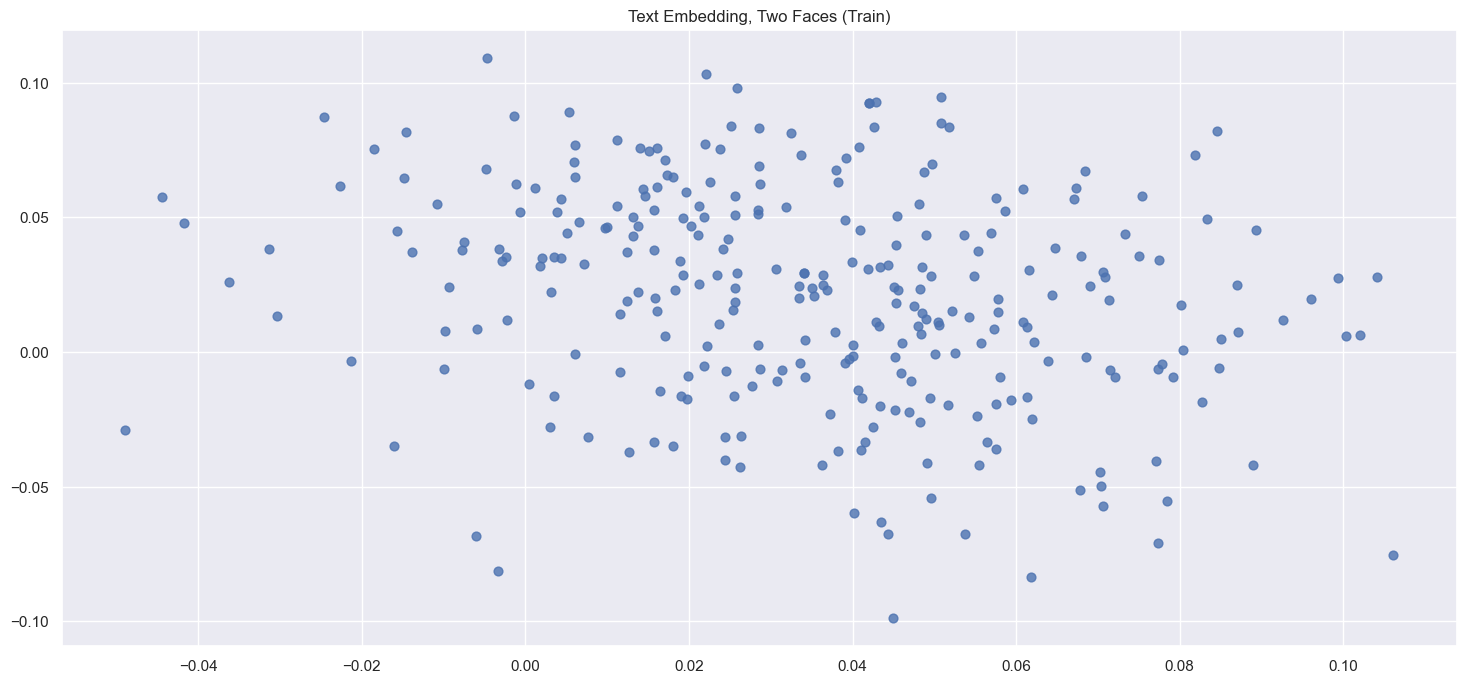

In [16]:
# Representación Gráfica
fig, ax1 = plt.subplots(1, figsize = (18, 8))
sc = ax1.scatter(embeddings[:, 0],
                 embeddings[:, 1], s = 40, alpha = 0.8)
ax1.set_title('Text Embedding, Two Faces (Train)');

## **SEMANTIC TEXTUAL SIMILARITY**

In [17]:
# Similitud coseno
# medida de la similitud existente entre dos vectores
cosine_scores = util.cos_sim(embeddings, embeddings)
cosine_scores

tensor([[1.0000, 0.3726, 0.3712,  ..., 0.5738, 0.5232, 0.4375],
        [0.3726, 1.0000, 0.3096,  ..., 0.4461, 0.3168, 0.2892],
        [0.3712, 0.3096, 1.0000,  ..., 0.4199, 0.3824, 0.3820],
        ...,
        [0.5738, 0.4461, 0.4199,  ..., 1.0000, 0.7573, 0.4163],
        [0.5232, 0.3168, 0.3824,  ..., 0.7573, 1.0000, 0.3410],
        [0.4375, 0.2892, 0.3820,  ..., 0.4163, 0.3410, 1.0000]])

In [18]:
# Find the pairs with the highest cosine similarity scores
Similaridad = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        Similaridad.append({'índice': [i, j], 'punt': cosine_scores[i][j]})

# Sort scores in decreasing order
Similaridad = sorted(Similaridad, key = lambda x: x['punt'], reverse=True)
Similaridad = pd.DataFrame(Similaridad)
Similaridad["punt"] = Similaridad["punt"].astype("float").round(3)

# Primeros 10
Similaridad.head(10)

,índice,punt
0,"[25, 214]",1.000
1,"[105, 170]",1.000
2,"[112, 261]",0.998
3,"[117, 175]",0.997
4,"[75, 116]",0.997
5,"[246, 258]",0.994
6,"[119, 241]",0.992
7,"[203, 256]",0.990
8,"[71, 217]",0.984
9,"[275, 279]",0.983


In [19]:
# Correlación de 1
print("índice 25")
print(df[["Título", "Empresa", "Descripción", "Publicación"]].iloc[25])
print("índice 214")
print(df[["Título", "Empresa", "Descripción", "Publicación"]].iloc[214])

print()

print("índice 105")
print(df[["Título", "Empresa", "Descripción", "Publicación"]].iloc[105])
print("índice 170")
print(df[["Título", "Empresa", "Descripción", "Publicación"]].iloc[170])


índice 25
Título         QA (Quality Assurance) Automation Engineer - R...
Empresa                                           FullStack Labs
Descripción    Acerca del empleo FullStack Labs is the fastes...
Publicación                                             14/11/22
Name: 25, dtype: object
índice 214
Título         QA (Quality Assurance) Automation Engineer wit...
Empresa                                           FullStack Labs
Descripción    Acerca del empleo FullStack Labs is the fastes...
Publicación                                             25/11/22
Name: 214, dtype: object

índice 105
Título                         Data Engineer - Remote - Colombia
Empresa                                           FullStack Labs
Descripción    Acerca del empleo FullStack Labs is the fastes...
Publicación                                             21/11/22
Name: 105, dtype: object
índice 170
Título                         Data Engineer - Remote - Colombia
Empresa                              

In [20]:
# Correlación cercana a 1
print("índice 246")
print(df[["Título", "Empresa", "Descripción", "Publicación"]].iloc[246])
print("índice 258")
print(df[["Título", "Empresa", "Descripción", "Publicación"]].iloc[258])

print()

print("índice 119")
print(df[["Título", "Empresa", "Descripción", "Publicación"]].iloc[119])
print("índice 241")
print(df[["Título", "Empresa", "Descripción", "Publicación"]].iloc[241])

índice 246
Título                                         Analista de datos
Empresa                                     Trabajo Joven Sí Hay
Descripción    Acerca del empleo Importante empresa del secto...
Publicación                                             28/10/22
Name: 246, dtype: object
índice 258
Título                                         Analista de datos
Empresa                   Multiempleos S.A. Servicios Temporales
Descripción    Acerca del empleo Importante empresa del secto...
Publicación                                             28/10/22
Name: 258, dtype: object

índice 119
Título                        Analista de datos nivel Excel Alto
Empresa                  Consultora de Recursos Humanos Nexo Sas
Descripción    Acerca del empleo Importante empresa del secto...
Publicación                                             22/11/22
Name: 119, dtype: object
índice 241
Título           Analista de datos Profesional- nivel Excel Alto
Empresa                  Consultora

In [21]:
# Correlación cercana a 1
print("índice 71")
print(df[["Título", "Empresa", "Descripción", "Publicación"]].iloc[71])
print("índice 217")
print(df[["Título", "Empresa", "Descripción", "Publicación"]].iloc[217])

print()

print("índice 275")
print(df[["Título", "Empresa", "Descripción", "Publicación"]].iloc[275])
print("índice 279")
print(df[["Título", "Empresa", "Descripción", "Publicación"]].iloc[279])

índice 71
Título                             Backend JVM Software Engineer
Empresa                                                     Addi
Descripción    Acerca del empleo Description  We are a techno...
Publicación                                             21/11/22
Name: 71, dtype: object
índice 217
Título                          Backend Python Software Engineer
Empresa                                                     Addi
Descripción    Acerca del empleo Description  We are a techno...
Publicación                                             26/11/22
Name: 217, dtype: object

índice 275
Título         Analista de Datos Con manejo de - SQL Excel Acces
Empresa                                     Trabajo Joven Sí Hay
Descripción    Acerca del empleo Importante empresa del secto...
Publicación                                             28/11/22
Name: 275, dtype: object
índice 279
Título           Analista de Datos con manejo de sql excel acces
Empresa                              

## **REDUCCIÓN DE DIMENSIONES**

In [22]:
# UMAP Hiperparametros
n_components = 3
n_neighbors = 20
min_dist = 0.

# UMAP
reducer_super = umap.UMAP(n_components = n_components,
                            n_neighbors = n_neighbors,
                            min_dist = min_dist,
                            random_state = 42,
                            metric = 'euclidean')

embedding_train = reducer_super.fit(embeddings)
embedding_train = reducer_super.transform(embeddings)

In [23]:
# 3 dimensiones
embedding_train.shape

(290, 3)

Text(0.5, 0.92, 'Text Embedding, Using UMAP (Train)')

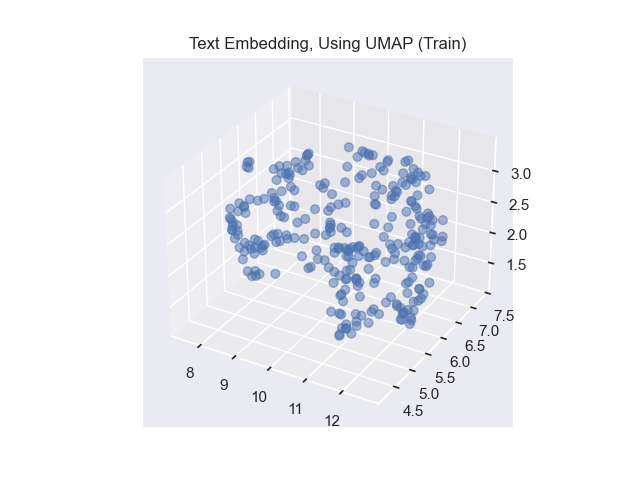

In [24]:
#pip install ipympl
%matplotlib widget

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
sc = ax.scatter(embedding_train[:,0], embedding_train[:,1], embedding_train[:,2], s = 40, alpha = 0.5)
ax.set_title('Text Embedding, Using UMAP (Train)')

## **CLUSTERING**

### **Número óptimo de clúster - Elbow**

In [25]:
from sklearn.cluster import KMeans

from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_umap = scaler.fit_transform(embedding_train)

n_max = 40

kmeans_kwargs = {"init": "random", "n_init": 10, "max_iter": 300, "random_state": 42}

sse = []

for k in range(1, n_max):
    kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
    kmeans.fit(scaled_umap)
    sse.append(kmeans.inertia_)

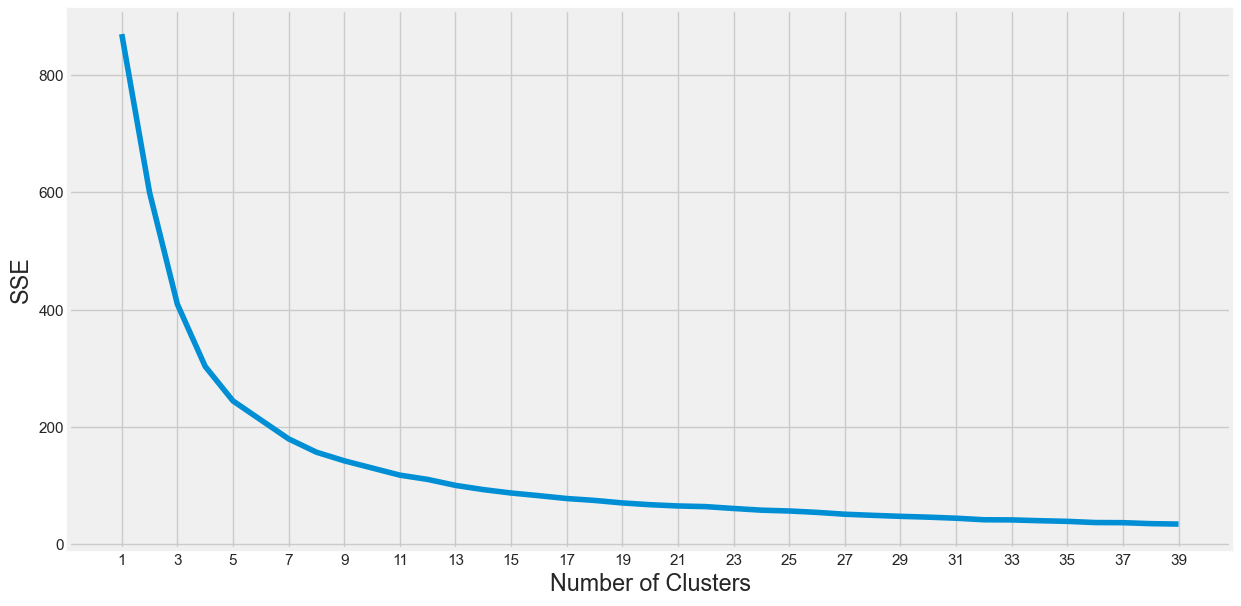

In [26]:
%matplotlib inline
plt.figure(figsize = (15, 7))
plt.style.use("fivethirtyeight")
plt.plot(range(1, n_max), sse)
plt.xticks(range(1, n_max, 2))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [27]:
# Número óptimo de clúster
kl = KneeLocator(range(1, n_max), sse, curve = "convex", direction = "decreasing")

kl.elbow

8

#### **K-MEANS**

/Users/valentinacardona/opt/anaconda3/envs/proyecto_linkedin/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


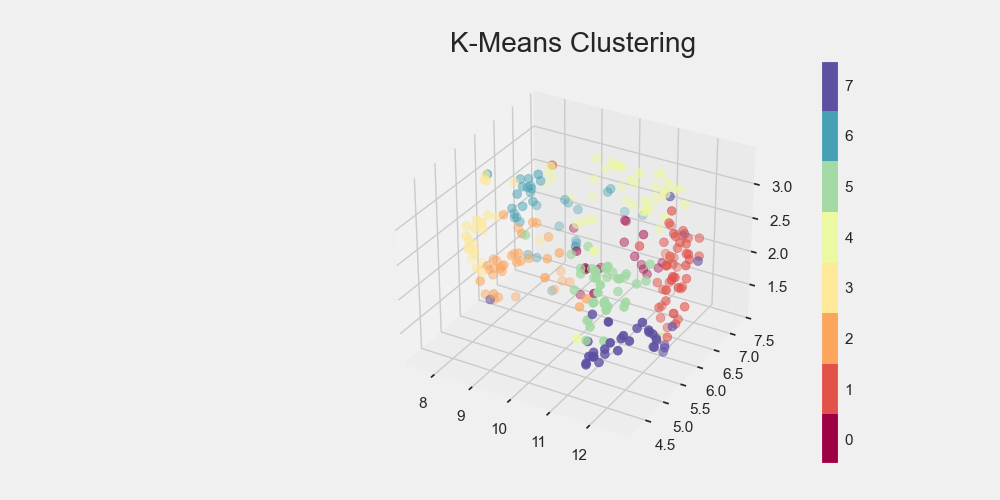

In [28]:
kmeans_labels = cluster.KMeans(n_clusters = 8).fit_predict(embeddings)
k_labels = np.unique(kmeans_labels)

%matplotlib widget

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(*embedding_train.T,
            c=kmeans_labels,
            s=40,
            cmap='Spectral');
cbar = fig.colorbar(sc,ax=ax,boundaries=np.arange(len(k_labels)+1)-0.5)
cbar.set_ticks(np.arange(len(k_labels)))
cbar.set_ticklabels(k_labels)
ax.set_title('K-Means Clustering');

In [29]:
df['K_Cluster'] = kmeans_labels
df.groupby(['K_Cluster']).size().reset_index(name = 'Frecuencia').sort_values(by = 'Frecuencia')

,K_Cluster,Frecuencia
0,0,18
3,3,28
6,6,34
7,7,34
2,2,37
5,5,40
4,4,49
1,1,50


In [30]:
k_3 = df[df["K_Cluster"] == 3].filter(["Descripción (inglés)"])

list_3 = []

for i in range(len(k_3)):
    list_3.append(k_3["Descripción (inglés)"].iloc[i])
    if i == 3:
        break;

In [31]:
list_3[0]

'Gorilla Logic provides nearshore Agile teams to Fortune 500 and SMB companies, bringing unparalleled expertise in the delivery of full-stack web, mobile, and enterprise applications. Our highly collaborative Agile Gorillas are uniquely qualified to implement complex software initiatives. With offices in the United States, Costa Rica, and Colombia, Gorilla Logic helps clients gain competitive advantages to achieve results faster.  Full-Stack Ruby on Rails Developer  Gorilla Logic is looking for a Fullstack Ruby on Rails Developer, working on our client’s production web application. Based in Medellin, Colombia, this is a unique and highly technical role, requiring strong Ruby on Rails and web development experience in delivering a leading-edge platform solution. Our environment will require you to work effectively with your teammates, of course. But your real success will be measured by how well you couple critical thinking with self-motivation, enthusiasm, and determination.  Technical

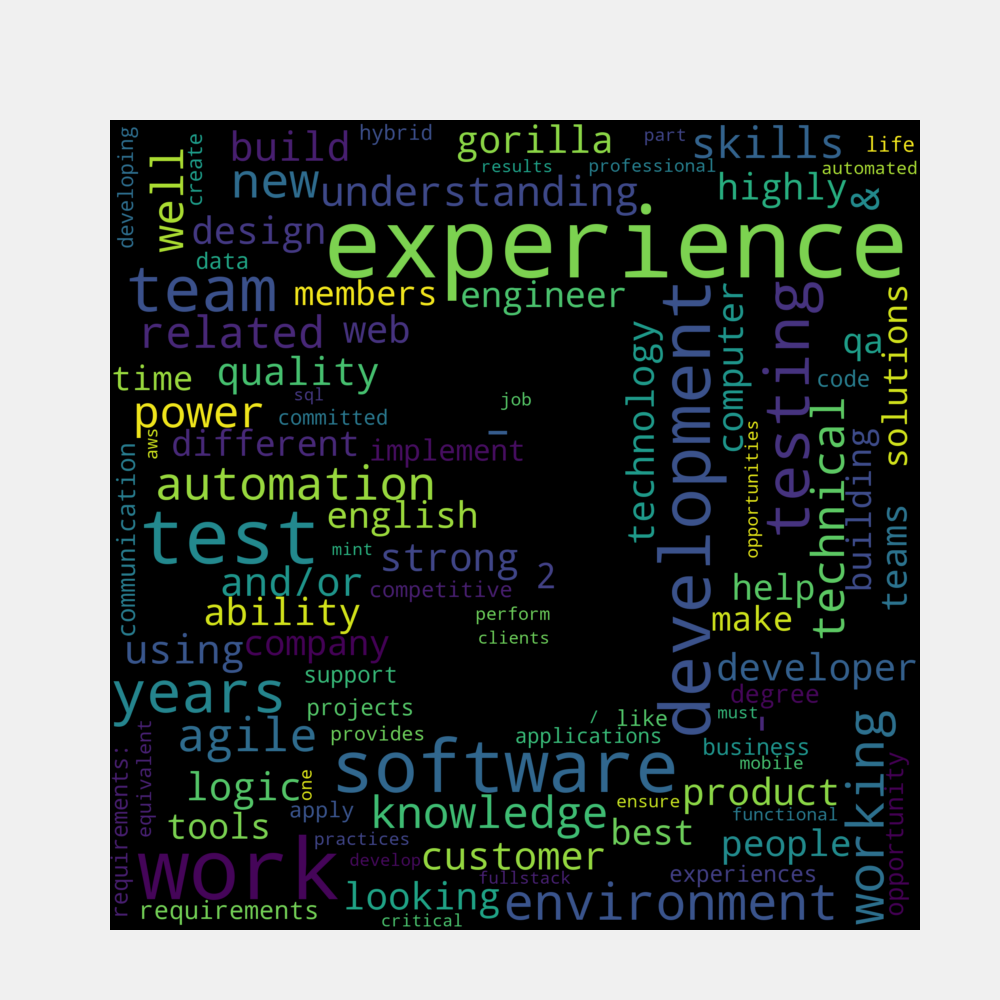

In [32]:
k_3['Descripción_no_stpwds'] = k_3["Descripción (inglés)"].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

most_common = Counter(" ".join(k_3["Descripción_no_stpwds"]).split())
most_common_show = most_common.most_common(100)

most_common_show_dict = dict(most_common_show)
img = np.array(Image.open('../Imagenes/Numero-3.png'))
wc = WordCloud(width = 800, height = 400, mask = img).generate_from_frequencies(most_common_show_dict)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()


In [33]:
k_0 = df[df["K_Cluster"] == 0].filter(["Descripción (inglés)"])

list_0 = []

for i in range(len(k_0)):
    list_0.append(k_0["Descripción (inglés)"].iloc[i])
    if i == 3:
        break;

In [34]:
list_0[0]

'En Edelman estamos buscando un Influencer Marketing Specialist, quien será responsable de brindar visión estratégica, liderar proyectos y desarrollar campañas de influencer marketing para nuestros clientes. Si cumples con los siguientes requisitos, ¡esta oportunidad es para ti!  3-5 años de experiencia en agencias de relaciones públicas, influencer marketing, mercadeo digital (o afines), o en departamentos de comunicaciones / m ercadeo. Experiencia en el desarrollo, ejecución y consecución de estrategias de influencer marketing y relaciones públicas en Colombia. Conocimiento del negocio del influencer marketing en Colombia: talentos, categorías, referentes, plataformas, tendencias, entre otros. Es un plus si ha trabajado con otros mercados en América Latina. Capacidad de desarrollar estrategias de influencer marketing con un alto componente cuantitativo, desde el establecimiento de los KPIs hasta el reporting basado en el monitoreo y análisis de la d ata. Buen relacionamiento con crea

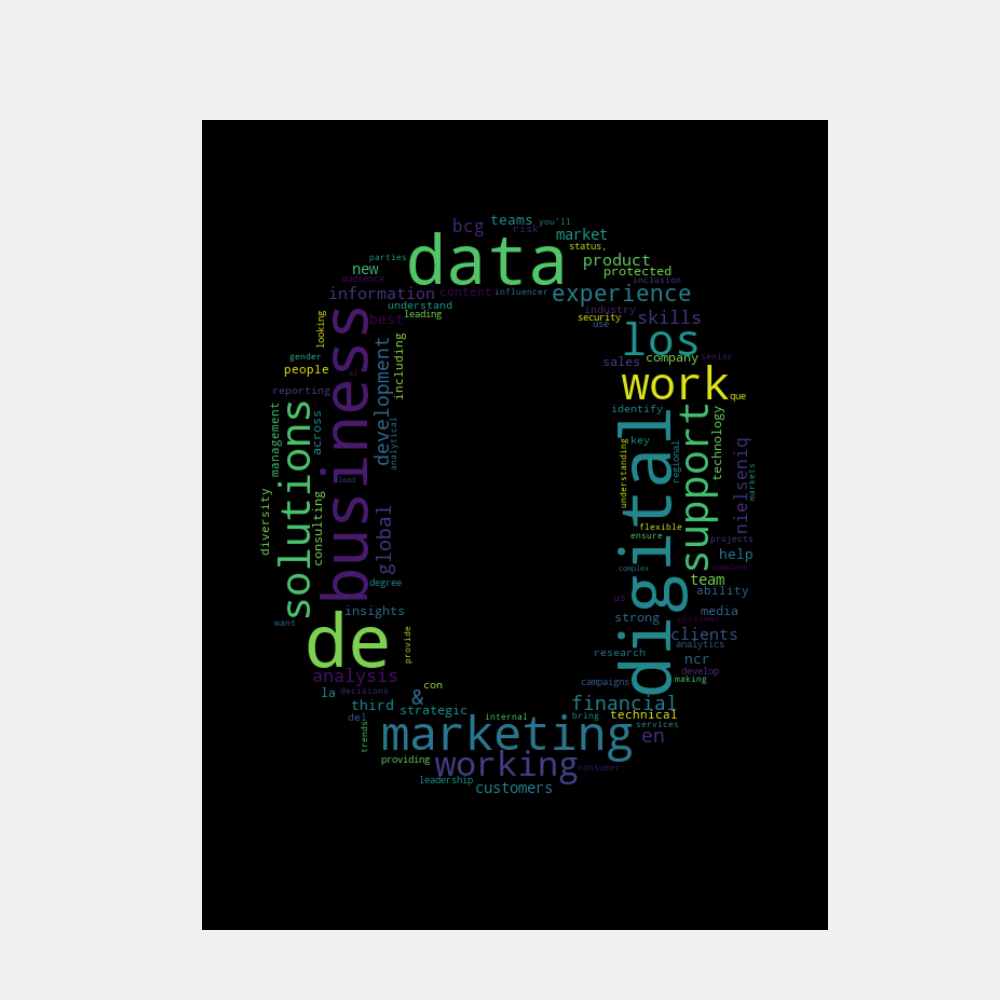

In [35]:
k_0['Descripción_no_stpwds'] = k_0["Descripción (inglés)"].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

most_common = Counter(" ".join(k_0["Descripción_no_stpwds"]).split())
most_common_show = most_common.most_common(100)

most_common_show_dict = dict(most_common_show)
img = np.array(Image.open('../Imagenes/Numero-0.png'))
wc = WordCloud(width = 800, height = 400, mask = img).generate_from_frequencies(most_common_show_dict)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.savefig("0")
plt.show()

In [36]:
k_7 = df[df["K_Cluster"] == 7].filter(["Descripción (inglés)"])

list_7 = []

for i in range(len(k_7)):
    list_7.append(k_7["Descripción (inglés)"].iloc[i])
    if i == 3:
        break;

In [37]:
list_7[2]

'We are looking for a Professional in business administration, economics, marketing, industrial or related engineering. Minimum 3 years experience in data analysis, sales projection management, statistical analysis of sales, data analysis, must handle very well statistics and have advanced Excel. A plus if you manage Power BI. Working hours: Monday to Friday from 7:00 am to 5:15 pm Salary: $2,352,000 Direct contract with the company, we have an annual bonus for compliance and casino service.'

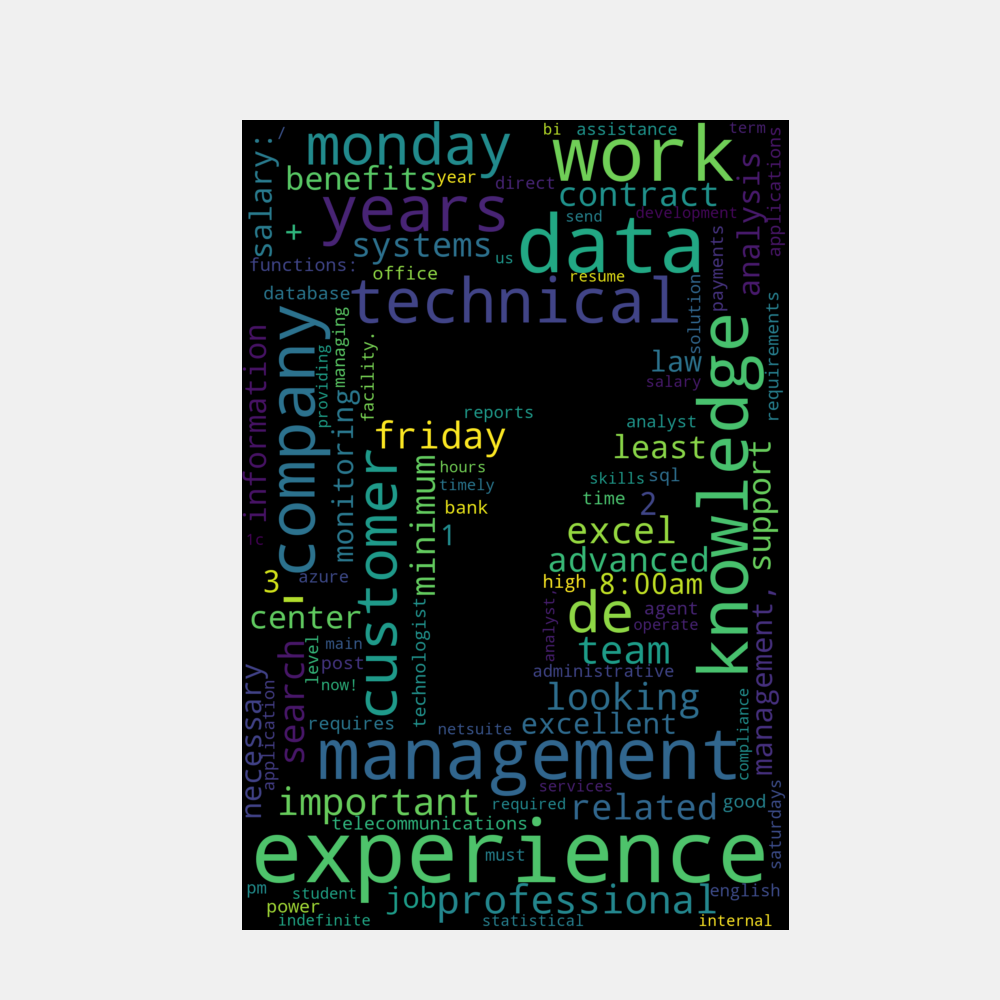

In [38]:
k_7['Descripción_no_stpwds'] = k_7["Descripción (inglés)"].str.lower().apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

most_common = Counter(" ".join(k_7["Descripción_no_stpwds"]).split())
most_common_show = most_common.most_common(100)

most_common_show_dict = dict(most_common_show)
img = np.array(Image.open('../Imagenes/Numero-7.png'))
wc = WordCloud(width = 800, height = 400, mask = img).generate_from_frequencies(most_common_show_dict)

plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.savefig("7")
plt.show()